In [16]:
# import necessary libraries
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix



#### Step 1: Business Understanding
#### Objective: Predict customer churn and identify key churn indicators.



#### Step 2: Data Understanding


In [20]:
# Load the dataset
df = pd.read_csv("D:/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df
# Display first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# Check for missing values
print(df.isnull().sum())
print("Missing values:")

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Missing values:


In [ ]:

# Check for missing values
print("Missing values:")



In [24]:

# Summary statistics
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [26]:
# Check data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:

# Count of unique values per column
print("Unique Values per Column:")
print(df.nunique())


Unique Values per Column:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


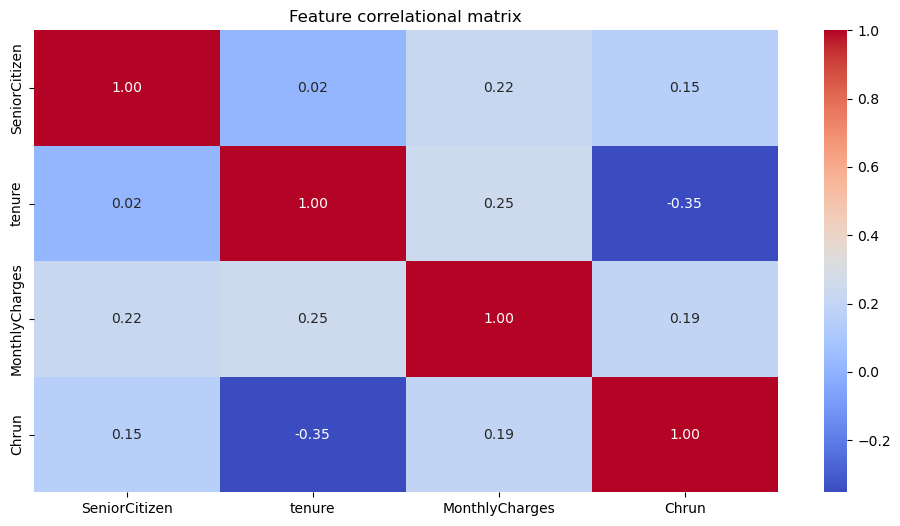

In [36]:
# select numeric columns only
number_cols=df.select_dtypes(include=[np.number]).columns.to_list()
number_cols
# Correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df[number_cols].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Feature correlational matrix")
plt.show()


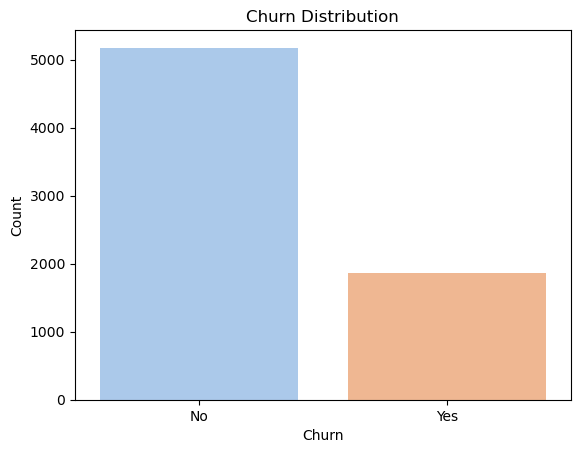

In [58]:
# Distribution of churn
#using seaborn
sns.countplot(x='Churn',data=df, hue='Churn', palette='pastel', legend= False)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()



#### Step 3: Data Preparation

In [62]:
# Encode categorical features
lable_encode= LabelEncoder()
print('before',df['Churn'])
df["Churn"]=lable_encode.fit_transform(df['Churn'])
print('after',df['Churn'])

before 0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object
after 0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32


In [64]:
# list categorical columns
df_new=df.drop(columns='customerID')
print(df_new.shape)
# Convert categorical variables to dummy variables
df_new=pd.get_dummies(df_new)
df_new.head()

(7043, 21)


,SeniorCitizen,tenure,MonthlyCharges,Churn,Chrun,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,0,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,0,0,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,1,1,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,0,0,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,1,1,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df_new.shape

(7043, 6578)

In [66]:
# Split features and target
x=df_new.drop('Churn',axis=1)
y=df_new['Churn']

In [78]:
# Train-test split
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)
print("Train-Features",x_train.head())
print("\nTrain-Target\n",y_train.head())

Train-Features       SeniorCitizen  tenure  MonthlyCharges  Chrun  gender_Female  \
3309              0      25           19.90      0           True   
3825              0      52           19.35      0           True   
3006              1      14           74.95      1          False   
2410              0      43           80.45      0           True   
734               0      27           90.15      0           True   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
3309        False        True        False           True           False   
3825        False       False         True          False            True   
3006         True        True        False           True           False   
2410        False       False         True           True           False   
734         False       False         True           True           False   

      ...  TotalCharges_995.35  TotalCharges_996.45  TotalCharges_996.85  \
3309  ...                False 

#### Step 4: Modeling

In [ ]:
# Train Random Forest Model


In [ ]:
# Train Logistic Regression Model


In [ ]:
# Step 5: Evaluation


In [ ]:
# find importtant features



In [ ]:
 # Step 6: Deployment (Flagging high-risk customers)

# create the input set data from df
